# Introduction
<u>__Description__</u>
Project investigating life expectancy and GDP through time in 6 countries.

<u>__Specific Questions to Answer__</u>
1. What do the distributions of the life expectancy & GDP data look like?
2. How do the summary statistics of life expectancy & GDP per country compare?
3. How has life expectancy changed over time in these countries & overall?
4. How has GDP changed over time in these countries & overall?
5. Is there a correlation between life expectancy & GDP in these countries & overall?

<u>__Data Sources__</u>
- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.
- Life expectancy Data Source: [World Health Organization](https://apps.who.int/gho/data/node.main.688)


# Preparation

## Import modules

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load data

In [6]:
df = pd.read_csv('all_data.csv')

# Exploration

## Data information & clean-up

In [9]:
# rename any pesky column
df = df.rename({"Life expectancy at birth (years)" : "LEABY"}, axis = "columns")
df.Country = df.Country.replace("United States of America", "USA")
# check head & shape
print(df.head())
print("\nShape of data: ", df.shape)
# print unique values
print("\nCountries: ", df.Country.unique())
print("\nYears: ", df.Year.unique())
print(f"\nLife expectancy at birth (years) range: {df.LEABY.min()} - {df.LEABY.max()}")
print(f"\nGDP range: {df.GDP.min() : .2e} - {df.GDP.max() : .2e}")

  Country  Year  LEABY           GDP
0   Chile  2000   77.3  7.786093e+10
1   Chile  2001   77.3  7.097992e+10
2   Chile  2002   77.8  6.973681e+10
3   Chile  2003   77.9  7.564346e+10
4   Chile  2004   78.0  9.921039e+10

Shape of data:  (96, 4)

Countries:  ['Chile' 'China' 'Germany' 'Mexico' 'USA' 'Zimbabwe']

Years:  [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]

Life expectancy at birth (years) range: 44.3 - 81.0

GDP range:  4.42e+09 -  1.81e+13


## Investigation

### Question 1: What do the distributions of the life expectancy & GDP data look like?

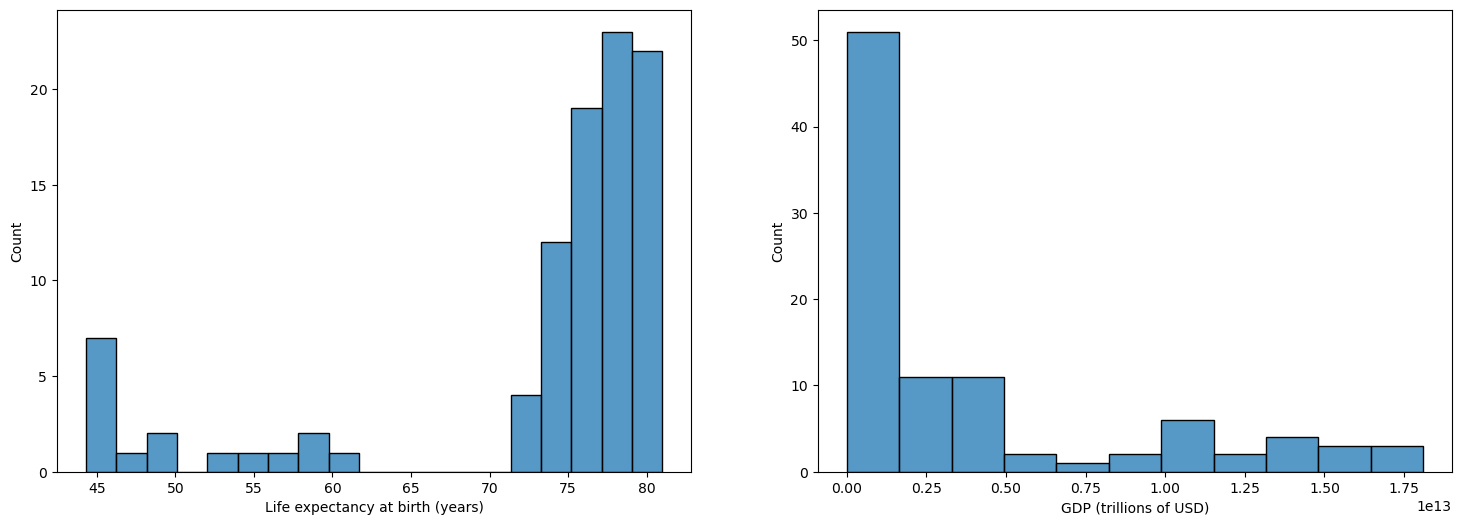

In [12]:
plt.figure(figsize=(18,6))

ax1 = plt.subplot(1,2,1)
sns.histplot(df.LEABY)
ax1.set_xlabel("Life expectancy at birth (years)")

ax2 = plt.subplot(1,2,2)
sns.histplot(df.GDP)
ax2.set_xlabel("GDP (trillions of USD)")

plt.show()

### Question 2: How do the means & medians of life expectancy & GDP per country compare?

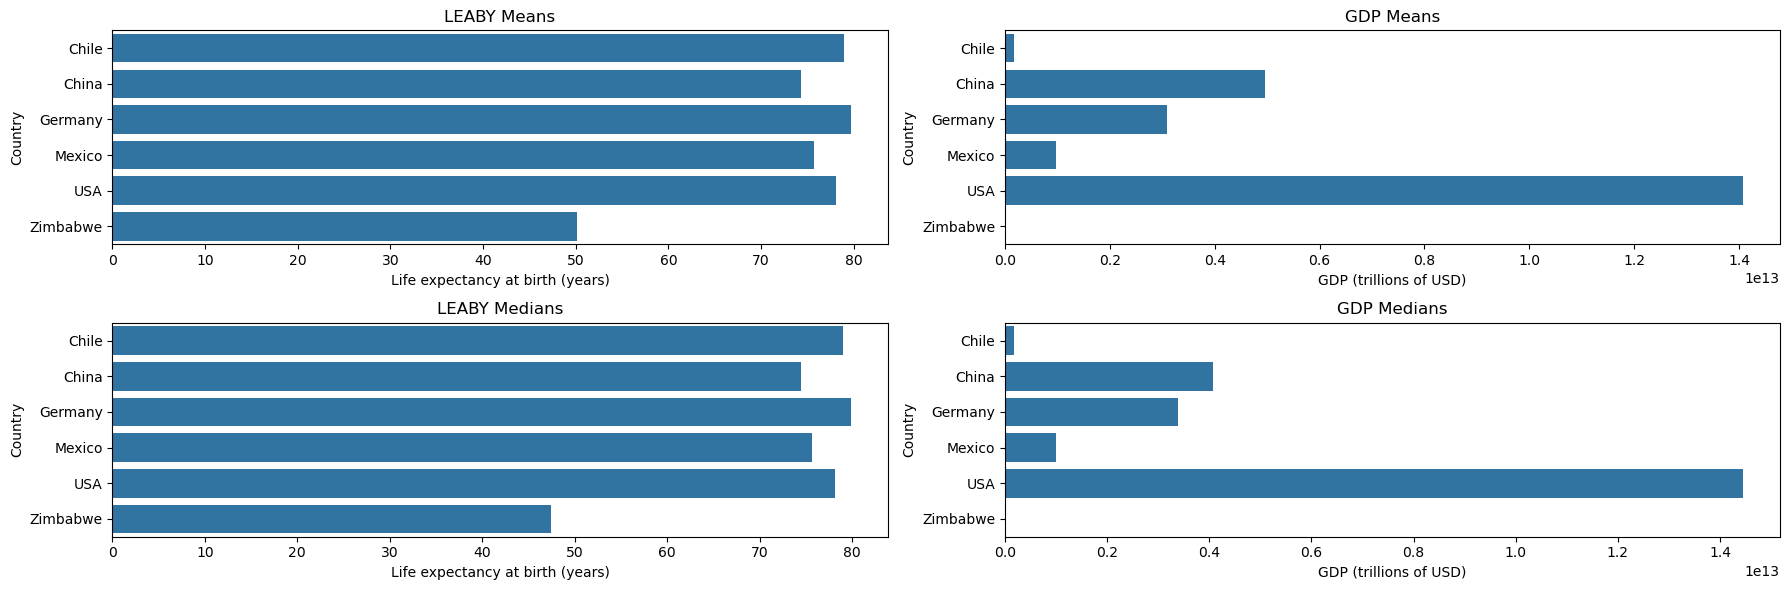

In [14]:
dfMeans = df.drop("Year", axis=1).groupby("Country").mean().reset_index()
dfMedians = df.drop("Year", axis=1).groupby("Country").median().reset_index()

plt.figure(figsize=(18,6))

ax1 = plt.subplot(2,2,1)
sns.barplot(data=dfMeans, x="LEABY", y="Country")
ax1.set_xlabel("Life expectancy at birth (years)")
ax1.title.set_text("LEABY Means")

ax2 = plt.subplot(2,2,2)
sns.barplot(data=dfMeans, x="GDP", y="Country")
ax2.set_xlabel("GDP (trillions of USD)")
ax2.title.set_text("GDP Means")

ax3 = plt.subplot(2,2,3)
sns.barplot(data=dfMedians, x="LEABY", y="Country")
ax3.set_xlabel("Life expectancy at birth (years)")
ax3.title.set_text("LEABY Medians")

ax4 = plt.subplot(2,2,4)
sns.barplot(data=dfMedians, x="GDP", y="Country")
ax4.set_xlabel("GDP (trillions of USD)")
ax4.title.set_text("GDP Medians")

plt.tight_layout()
plt.show()

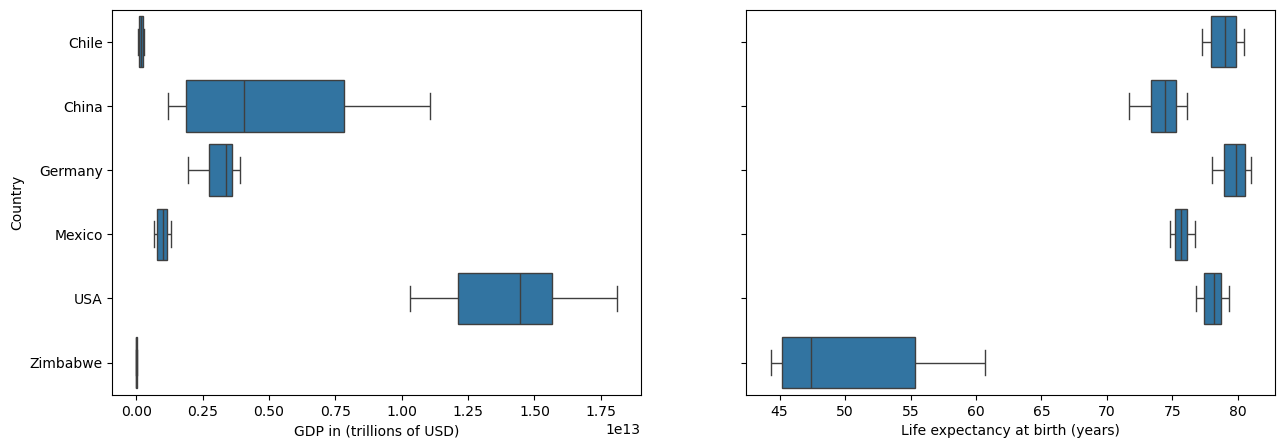

In [15]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.boxplot(ax=axes[0], x=df.GDP, y=df.Country)
axes[0].set_xlabel("GDP in (trillions of USD)")
axes[1] = sns.boxplot(ax=axes[1], x=df.LEABY, y=df.Country)
axes[1].set_xlabel("Life expectancy at birth (years)");

plt.show()

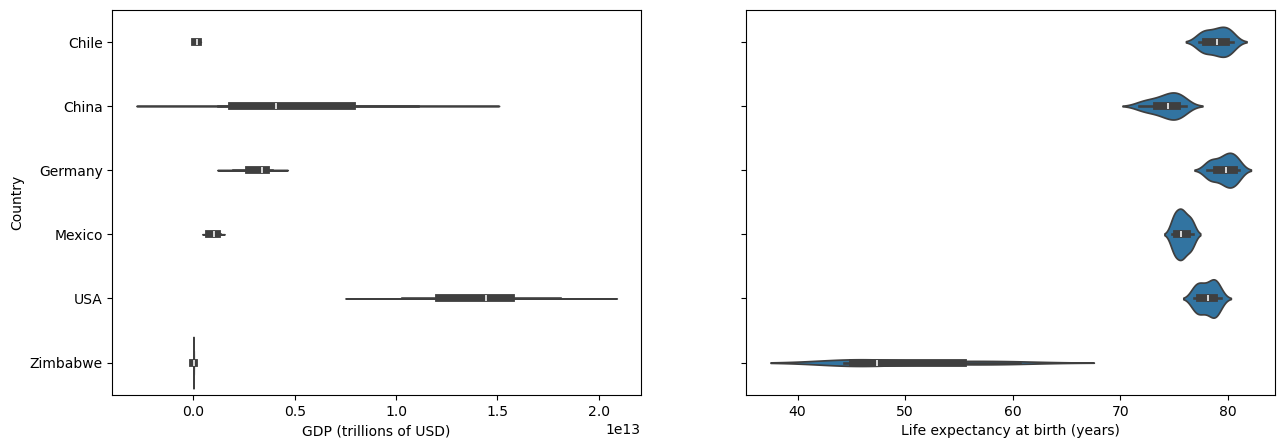

In [16]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.violinplot(ax=axes[0], x=df.GDP, y=df.Country)
axes[0].set_xlabel("GDP (trillions of USD)")
axes[1] = sns.violinplot(ax=axes[1], x=df.LEABY, y=df.Country)
axes[1].set_xlabel("Life expectancy at birth (years)");

plt.show()

### Question 3: How has life expectancy changed over time in these countries & overall?

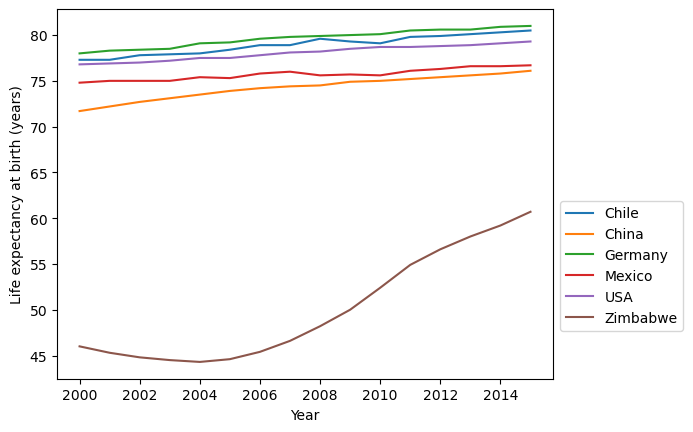

In [18]:
sns.lineplot(x=df.Year, y=df.LEABY, hue=df.Country)
plt.legend(bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("Life expectancy at birth (years)")
plt.show()

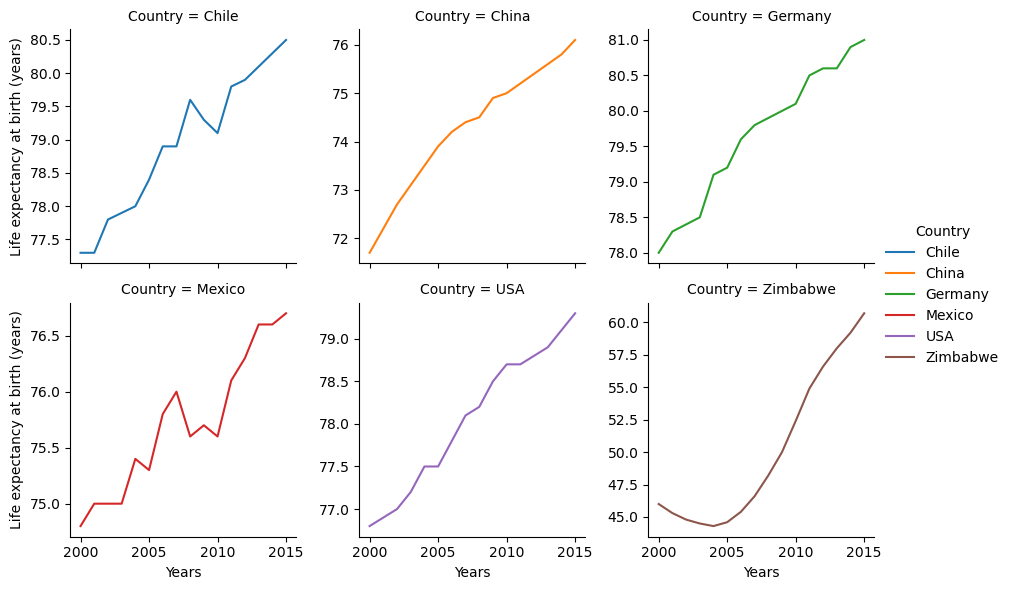

In [19]:
graphLEABY = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)
graphLEABY = (graphLEABY.map(sns.lineplot,"Year", "LEABY")
              .add_legend()
              .set_axis_labels("Years", "Life expectancy at birth (years)")
             )
plt.show()

### Question 4: How has GDP changed over time in these countries & overall?

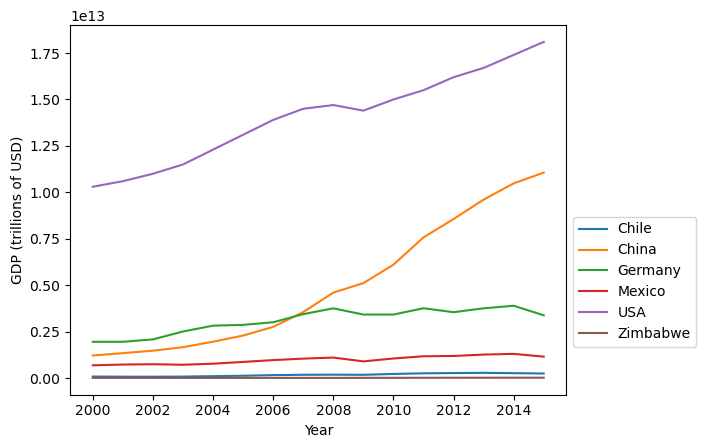

In [21]:
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country)
plt.legend(bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP (trillions of USD)")
plt.show()

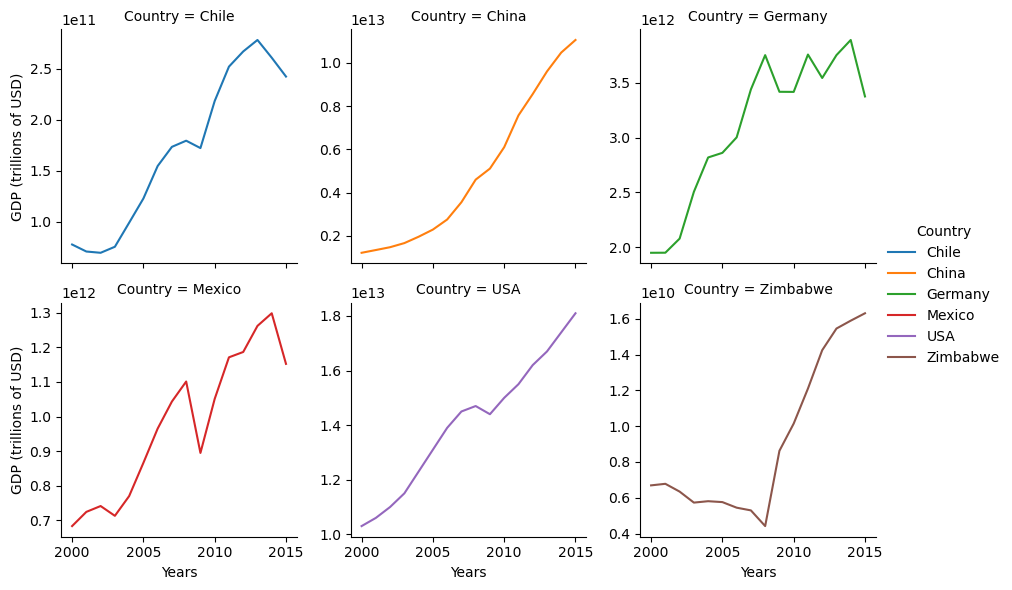

In [22]:
graphGDP = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)
graphGDP = (graphGDP.map(sns.lineplot,"Year", "GDP")
              .add_legend()
              .set_axis_labels("Years", "GDP (trillions of USD)")
             )
plt.show()

### Question 5: Is there a correlation between life expectancy & GDP in these countries & overall?

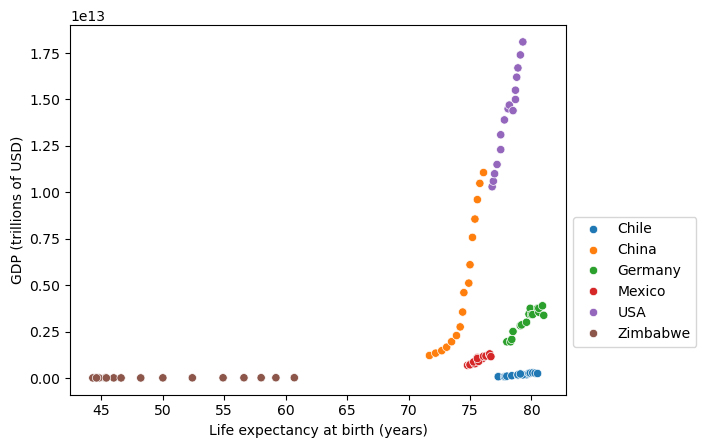

In [24]:
sns.scatterplot(data=df, x="LEABY", y="GDP", hue="Country")
plt.legend(bbox_to_anchor=(1, 0.5), ncol=1)
plt.xlabel("Life expectancy at birth (years)")
plt.ylabel("GDP (trillions of USD)")
plt.show()

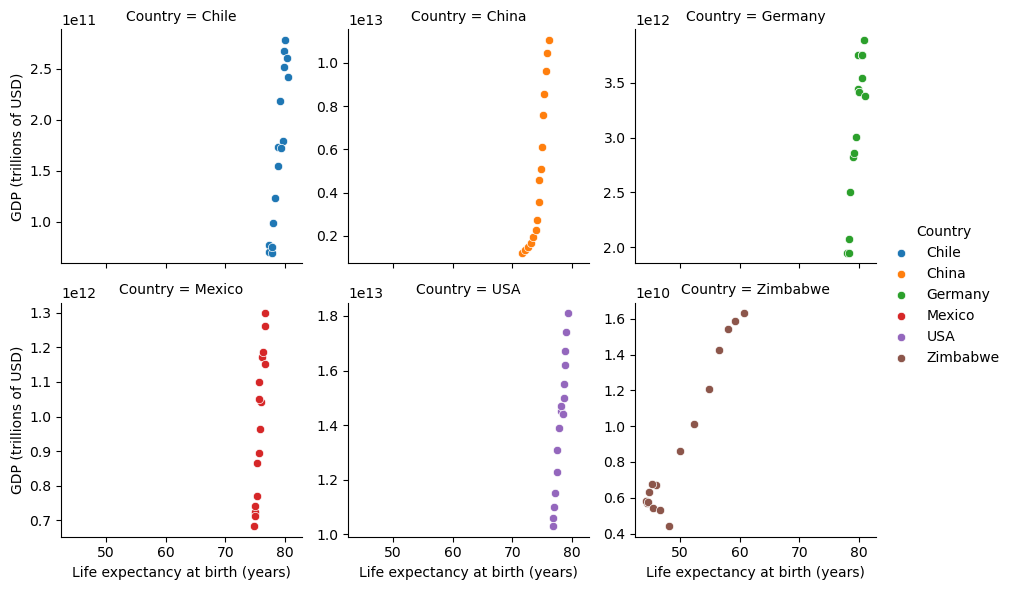

In [25]:
graph = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)
graph = (graph.map(sns.scatterplot,"LEABY", "GDP")
              .add_legend()
              .set_axis_labels("Life expectancy at birth (years)", "GDP (trillions of USD)")
             )
plt.show()

# Conclusions

1. What do the distributions of the life expectancy & GDP data look like?  
LEABY is skewed to the left, and GDP is very skewed to the right

2. How do the summary statistics of life expectancy & GDP per country compare?  
LEABY means & medians are very similarm for all countries being about 75-80 years, except for Zimbabwe which is about 48-50
GDP mean & medians are also somewhat similar, but vary greatly between countries, with a clear lead of then USA (about 1.4 trillion USD), with the rest of the countries having values under 0.6 and a clear order to the sizes of their GDPs, with Chile and Zimbabwe being the lowest (not reaching 0.05)
With respect to range, the widest distribution for GDP is China, and for LEABY is Zimbabwe.

4. How has life expectancy changed over time in these countries & overall?  
All countries have an overall upward trend in life expectancy at birth. There is a large gap in the ranges of values between Zimbabwe (40-60) and the rest of the countries (70-80). Life expectancy at birth was noticeably lower in Zimbabwe than in other countries, but this country has also shown the largest growth.

5. How has GDP changed over time in these countries & overall?  
All countries have an overall upward trend in GDP. There is a large gap in the ranges of values between USA (1-1.8 trillion), China (0.2-1.0 trillion), and the rest of the countries (below 0.5 trillion). GDP was noticeably higher in the USA than in other countries, and China has shown the largest growth.

6. Is there a correlation between life expectancy & GDP in these countries & overall?  
There is a clear positive correlation between life expectancy at birth and GDP in each country and overall, with the only small outliers (seems slightly nonlinear) being from Zimbabwe.

